# Capstone III Preprocessing and Training Data Development

In this section we prepare our cleaned data for modeling. With this data set we have, in a sense, two sets of explanatory variables that may explain our target variable: time (how the room temperature changes over time), and the rest of the measurement data (how does co2/light/precipatation affect the room temperature). What we'd like to do model both sets of independent/dependent variables seperately to see which model better predicts room temperature. 

Our data has already come to us split into training and testing sets.

### Section 1: Loading and Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
train = pd.read_csv('../Data/train_cleaned.csv', parse_dates = ['date', 'date_time'], index_col = 'date_time')

In [3]:
train.index = pd.date_range(start=train.index[0], end=train.index[-1], freq='15min')

In [4]:
train.head()

,date,co2_dining_room,co2_room,relative_humidity_dining_room,relative_humidity_room,lighting_dining_room,lighting_room,rain,sun_dusk,wind,sun_light_in_west_facade,sun_light_in_east_facade,sun_light_in_south_facade,sun_irradiance,outdoor_relative_humidity,day_of_the_week,indoor_temperature_room
2012-03-13 11:45:00,2012-03-13,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.3750,2.0,17.8275
2012-03-13 12:00:00,2012-03-13,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.8080,2.0,18.1207
2012-03-13 12:15:00,2012-03-13,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.4320,2.0,18.4367
2012-03-13 12:30:00,2012-03-13,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,47.0240,2.0,18.7513
2012-03-13 12:45:00,2012-03-13,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,45.4743,2.0,19.0414


In [9]:
X = train.drop(columns = 'indoor_temperature_room')
y = train['indoor_temperature_room']

### Section 2 Review Stationary to Determine Order for ARIMA Modeling

In [37]:
stationarity = kpss(y, regression = 'c')
print('The kpss p-value for the orginal data is', stationarity[1])
stationarity = kpss(y.diff().dropna(), regression = 'c')
print('The kpss p-value for the first difference is', stationarity[1])
adful = adfuller(y)
print('The augmented dickey-fuller p-value for the original data is', adful[1])
adf = adfuller(y.diff().dropna())
print('The augmented dickey-fuller p-value for the first difference is', adf[1])

The kpss p-value for the orginal data is 0.01
The kpss p-value for the first difference is 0.1
The augmented dickey-fuller p-value for the original data is 5.973892846388229e-07
The augmented dickey-fuller p-value for the first difference is 3.379989036546519e-23


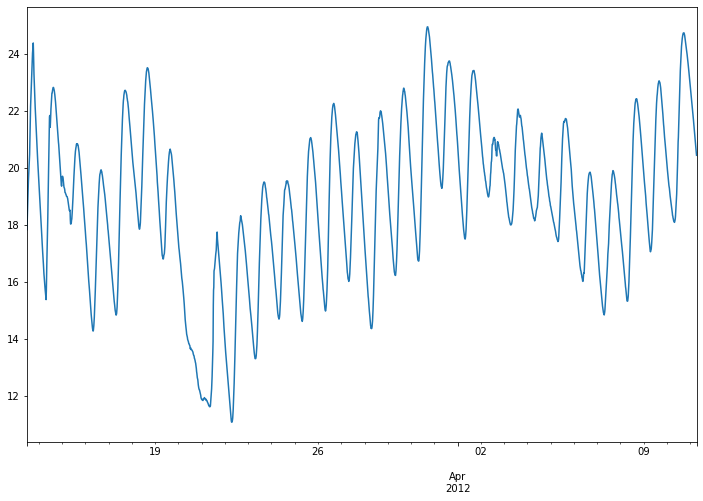

In [10]:
# Remind ourselves of the shape of the dependent variable over time
# By the KPSS test above, this not a stationary series
# By the augmented dickey-fuller test above, this series is a random walk
fig = plt.figure(figsize=(12, 8))
y.plot()
plt.show()

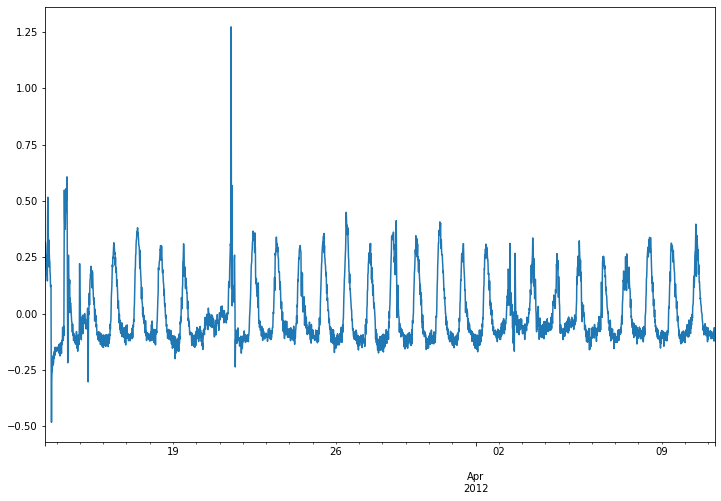

In [38]:
# And the graph of the first difference
# By the KPSS test above this differenced series is stationary
# By the augmented dickey-fuller test above, this series is a random walk
fig = plt.figure(figsize=(12, 8))
y.diff().dropna().plot()
plt.show()

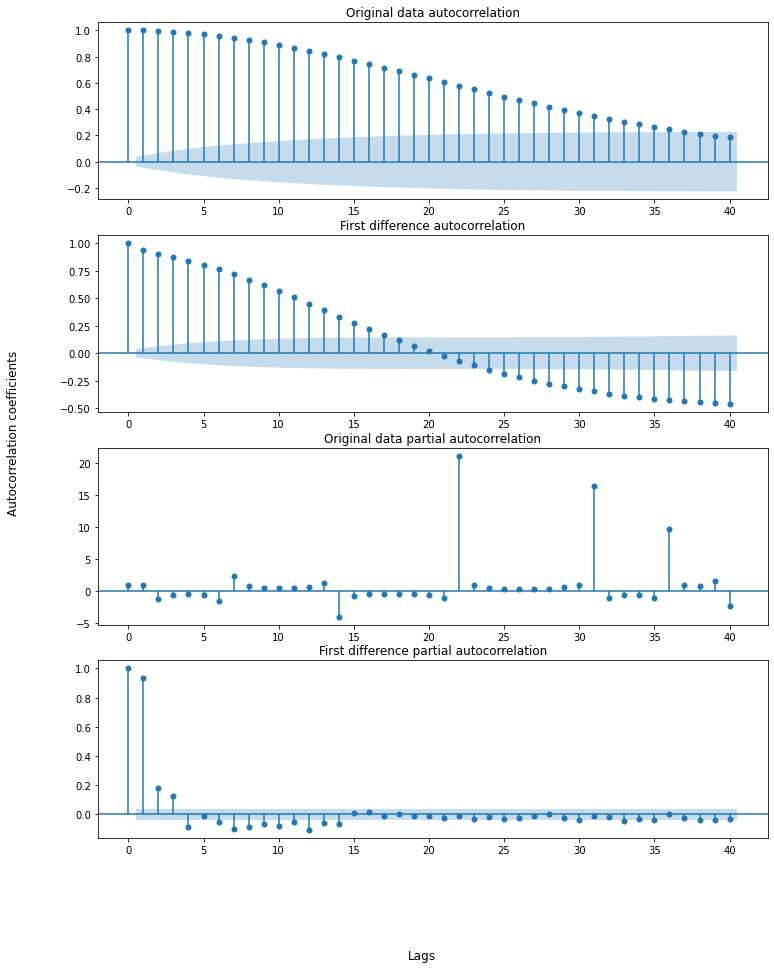

In [48]:
# And the acf for the original and difference data, and the pacf of the original data
fig, axes = plt.subplots(4,1,figsize=(12,15))

acf = plot_acf(y, lags=40, ax=axes[0])
acf_diff = plot_acf(y.diff().dropna(), lags = 40, ax = axes[1])
pacf = plot_pacf(y, lags=40, ax=axes[2])
pacf = plot_pacf(y.diff().dropna(), lags=40, ax=axes[3])

axes[0].title.set_text('Original data autocorrelation')
axes[1].title.set_text('First difference autocorrelation')
axes[2].title.set_text('Original data partial autocorrelation')
axes[3].title.set_text('First difference partial autocorrelation')
fig.supxlabel('Lags')
fig.supylabel('Autocorrelation coefficients')

plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [118]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split= int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit()
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [126]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split= int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    model = ARIMA(past, order=arima_order)
    model_fit = model.fit()
    future = model_fit.forecast(len(test))
    # calculate out of sample error
    error = mean_squared_error(test,future)
    # Return the error
    return error

In [127]:
# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p , d, q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    print('mse',mse)

                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except KeyboardInterrupt:
                    break
                except Exception as e:
                    print('failed!', e)
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [128]:
# Now, we choose a couple of values to try for each parameter.
p = [x for x in range(0, 3)]
d = [x for x in range(0, 3)]
q = [x for x in range(0, 3)]

In [129]:
evaluate_models(train['indoor_temperature_room'], p, d, q)

mse 6.6969638818146
ARIMA(0, 0, 0) MSE=6.697
mse 6.688098985273157
ARIMA(0, 0, 1) MSE=6.688
mse 6.677882934816555
ARIMA(0, 0, 2) MSE=6.678
mse 8.362549284972875
ARIMA(0, 1, 0) MSE=8.363
mse 8.783545494368125
ARIMA(0, 1, 1) MSE=8.784
mse 9.161373948342167
ARIMA(0, 1, 2) MSE=9.161
mse 5809.899174534432
ARIMA(0, 2, 0) MSE=5809.899
mse 5429.358185747201
ARIMA(0, 2, 1) MSE=5429.358
mse 5544.2556945689685
ARIMA(0, 2, 2) MSE=5544.256
mse 7.673799082463654
ARIMA(1, 0, 0) MSE=7.674
mse 7.843127233639018
ARIMA(1, 0, 1) MSE=7.843
mse 7.987159793649911
ARIMA(1, 0, 2) MSE=7.987
mse 28.718104336493038
ARIMA(1, 1, 0) MSE=28.718
mse 54.83912876472115
ARIMA(1, 1, 1) MSE=54.839
mse 65.96444855618415
ARIMA(1, 1, 2) MSE=65.964
mse 5446.146522473493
ARIMA(1, 2, 0) MSE=5446.147
mse 5489.439064075606
ARIMA(1, 2, 1) MSE=5489.439
mse 5524.078982101012
ARIMA(1, 2, 2) MSE=5524.079
mse 6.416031754854103
ARIMA(2, 0, 0) MSE=6.416
mse 6.415137567233226
ARIMA(2, 0, 1) MSE=6.415
mse 6.539439815661036
ARIMA(2, 0, 2) MS

In [130]:

model = ARIMA(y[:-5], order = (2,0, 1))
model_fit = model.fit()
future = model_fit.forecast(5)

In [131]:
print( list(zip(y[:-5], future)))
print(np.mean([ (i[0] - i[1] )**2 for i in list(zip(y[:-5], future))]))

[(17.8275, 20.787327728769935), (18.1207, 20.676929245220038), (18.4367, 20.56513245656091), (18.7513, 20.45225874932836), (19.0414, 20.33862238714268)]
4.880231889775274


In [154]:
X.columns

Index(['date', 'co2_dining_room', 'co2_room', 'relative_humidity_dining_room',
       'relative_humidity_room', 'lighting_dining_room', 'lighting_room',
       'rain', 'sun_dusk', 'wind', 'sun_light_in_west_facade',
       'sun_light_in_east_facade', 'sun_light_in_south_facade',
       'sun_irradiance', 'outdoor_relative_humidity', 'day_of_the_week'],
      dtype='object')

In [160]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
split = int(len(X)*0.8)
df_train = X.iloc[:split]
y_train = y[:split]

columns = ['co2_dining_room', 'co2_room', 'relative_humidity_dining_room',
       'relative_humidity_room', 'lighting_dining_room', 'lighting_room',
       'rain', 'sun_dusk', 'wind', 'sun_light_in_west_facade',
       'sun_light_in_east_facade', 'sun_light_in_south_facade',
       'sun_irradiance', 'outdoor_relative_humidity', 'day_of_the_week']
clf.fit(df_train[columns].values, y_train)

RandomForestRegressor()

In [164]:
clf.predict(X.iloc[split:][columns].values)

array([20.454972, 20.209334, 20.829369, 21.071886, 21.089495, 21.136265,
       20.396687, 21.279863, 21.274862, 21.149898, 21.182023, 21.03397 ,
       20.886389, 20.879616, 20.795269, 20.757277, 20.79288 , 20.449841,
       20.68975 , 20.88713 , 20.578945, 20.259412, 20.197663, 20.184365,
       19.623566, 19.572424, 19.621888, 19.582257, 19.403532, 19.533536,
       19.515239, 19.531359, 19.621063, 19.461133, 19.620892, 19.525273,
       19.411127, 19.40367 , 19.273702, 19.300173, 19.249887, 19.53406 ,
       19.20713 , 19.185357, 19.19285 , 19.330328, 19.216473, 18.909285,
       19.18066 , 18.509665, 18.562679, 18.401632, 18.651244, 18.454958,
       18.651915, 18.340412, 18.394226, 18.157391, 18.625655, 18.49156 ,
       18.176758, 18.089193, 18.288071, 18.32198 , 18.410903, 18.305731,
       18.437412, 18.238918, 18.258726, 18.425218, 18.03424 , 17.905255,
       18.056497, 18.289556, 18.285726, 18.350148, 18.453726, 18.442606,
       18.443371, 18.670735, 18.929619, 18.886696, 

In [161]:
np.mean([ (i[0] - i[1])**2 for i in  zip(y[split:], clf.predict(X.iloc[split:][columns].values))])

3.426981990532952

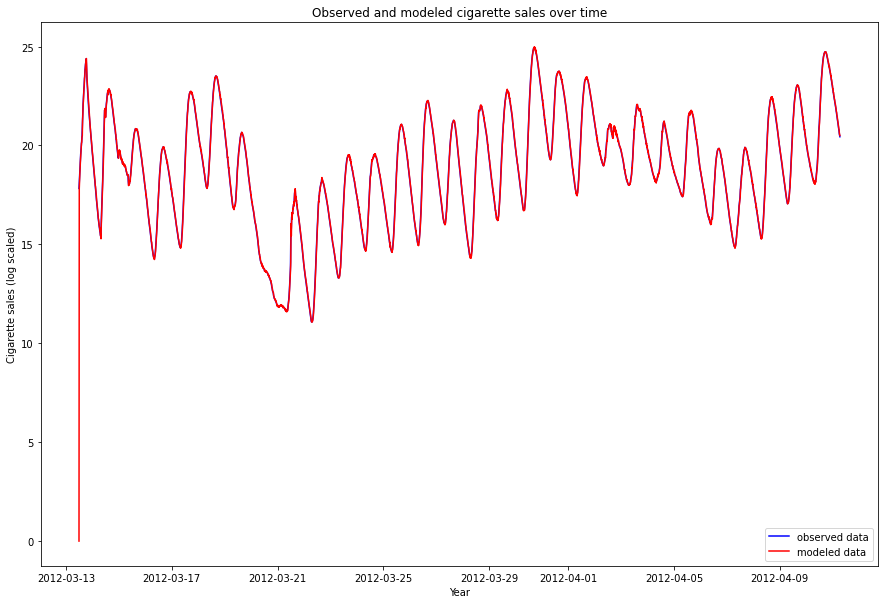

In [91]:
plt.figure(figsize=(15,10))
plt.plot(y, label='observed data', color = 'blue')
plt.plot(model_fit.predict(), color = 'red', label='modeled data')
plt.title('Observed and modeled cigarette sales over time')
plt.xlabel('Year')
plt.ylabel('Cigarette sales (log scaled)')
plt.legend(loc = 'best')
plt.show()

In [53]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['indoor_temperature_room'], order = (0, 1, 1))

In [36]:
import statsmodels.api as sm

mod = sm.tsa.arima.ARIMA(y, order=(38, 0, 0))
res = model.fit()

res.params

C:\Users\metal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  warnings.warn('No frequency information was'
C:\Users\metal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  warnings.warn('No frequency information was'
C:\Users\metal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  warnings.warn('No frequency information was'


ma.L1     0.792644
sigma2    0.008295
dtype: float64

<AxesSubplot:>

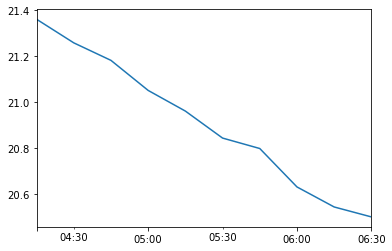

In [41]:
pred = res.predict(start='2012-04-11 04:15:00', end='2012-04-11 06:30:00')
pred.plot()

In [54]:
import statsmodels.api as sm

mod = sm.tsa.arima.ARIMA(df['indoor_temperature_room'], order=(38, 0, 0))
res = model.fit()

res.params

ma.L1     0.792644
sigma2    0.008295
dtype: float64

### Scale for Logistic Regression

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train.to_numpy())

TypeError: float() argument must be a string or a number, not 'Timestamp'

### Section : Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.33, random_state=42)